# Logistic Regression

In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # reorder randomly (important later)
X,Y  = ml.shuffleData(X,Y) # reorder randomly (important later) - uses numpy’s permute to iterate over data randomly
X,_  = ml.rescale(X) # works much better on rescaled data - rescaling and centering the data may help speed up convergence

XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

Note: all of the data is being used for training since the focus is on the learning algorithm, rather than performance.

In [3]:
print(f'{XA.shape=}')
print(f'{YA.shape=}')
print(f'{np.unique(YA)=}')
print(f'{XB.shape=}')
print(f'{YB.shape=}')
print(f'{np.unique(YB)=}')

XA.shape=(99, 2)
YA.shape=(99,)
np.unique(YA)=array([0., 1.])
XB.shape=(99, 2)
YB.shape=(99,)
np.unique(YB)=array([1., 2.])


### 1)
- Show the two classes in a scatter plot (one for each data set) and verify that one data set is linearly separable while the other is not.

In [4]:
def plot_scatter(data):
        class_labels_column = data[:, -1]
        colors = ['blue', 'green', 'red', 'purple', 'orange']
        for i, c in enumerate(np.unique(class_labels_column)):
                mask = class_labels_column == c  # Finding the right points
                plt.scatter(data[mask, 0], data[mask, 1], s=120, c=colors[i], alpha=0.75)
        plt.legend(np.unique(class_labels_column))
        plt.show()

In [5]:
data_A = np.concatenate((XA, YA.reshape(-1,1)), 1)
print(f'{data_A.shape=}')
data_B = np.concatenate((XB, YB.reshape(-1,1)), 1)
print(f'{data_B.shape=}')

data_A.shape=(99, 3)
data_B.shape=(99, 3)


data_A


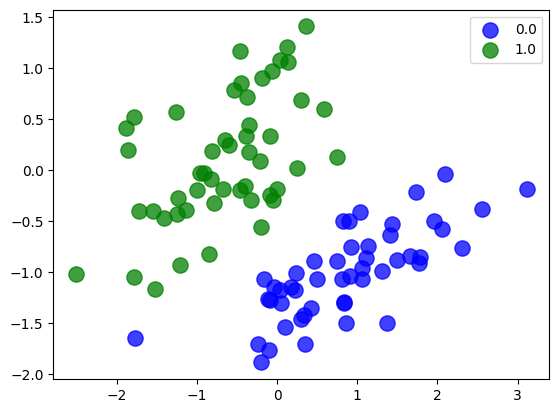

data_B


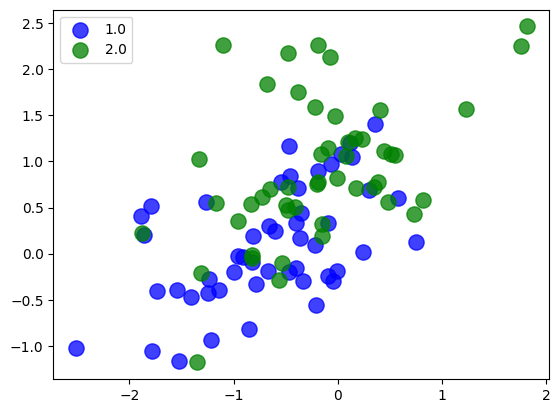

In [6]:
all_data = [{'data_A': data_A}, {'data_B': data_B}]
for current_data in all_data:
        for label, data in current_data.items():
                print(label)
                plot_scatter(data)

### 2)
- Testing implementation of logisticClassify2 functions: plotBoundary( ) by creating a “blank” learner.

In [ ]:
def plotBoundary(self,X,Y):
        """ Plot the (linear) decision boundary of the classifier, along with data """
        if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
        ax = X.min(0), X.max(0); ax = (ax[0][0], ax[1][0], ax[0][1], ax[1][1]);
        # TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
        # TODO find x2 values as a function of x1's values
        x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
        x2bx = (-self.theta[0] - self.theta[1] * x1b[0])/self.theta[2]
        x2by = (-self.theta[0] - self.theta[1] * x1b[1])/self.theta[2]
        #x2b = NotImplementedError;      # TODO find x2 values as a function of x1's values
        x2b = np.array([x2bx,x2by])# TODO find x2 values as a function of x1's values

        ## Now plot the data and the resulting boundary:
        A = Y==self.classes[0]; # and plot it:
        plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();

In [7]:
import mltools as ml
from logisticClassify2 import *

learner_A = logisticClassify2(); # create "blank" learner
learner_A.classes = np.unique(YA) # define class labels using YA or YB
wts_A = np.array([0.5, -0.25, 1]) # theta values corresponding to the classifier, sign( .5 − (.25)x_1 + (1)x_2 )
learner_A.theta = wts_A; # set the learner’s parameters

/Users/Tarek/Documents/UCI_MDS_Coding/cs273P/hw/3-Homework/Assignment 3/logisticClassify2.py:130: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if plot is not False and plot is not 'last':
/Users/Tarek/Documents/UCI_MDS_Coding/cs273P/hw/3-Homework/Assignment 3/logisticClassify2.py:148: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if plot is 'last':
/Users/Tarek/Documents/UCI_MDS_Coding/cs273P/hw/3-Homework/Assignment 3/logisticClassify2.py:156: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if plot is 'last':


In [8]:
learner_B = logisticClassify2(); # create "blank" learner
learner_B.classes = np.unique(YB) # define class labels using YA or YB
wts_B = np.array([0.5, -0.25, 1]) # theta values corresponding to the classifier, sign( .5 − (.25)x_1 + (1)x_2 )
learner_B.theta = wts_B; # set the learner’s parameters

Demoing the function that plots the decision boundary corresponding to the classifier:
$$ sign(0.5 -0.25x_1 + 1x_2) $$
along with the A data, and again with the B data. 

*These fixed parameters will look like an OK classifier on one data set, but a poor classifier on the other.*

learner_A


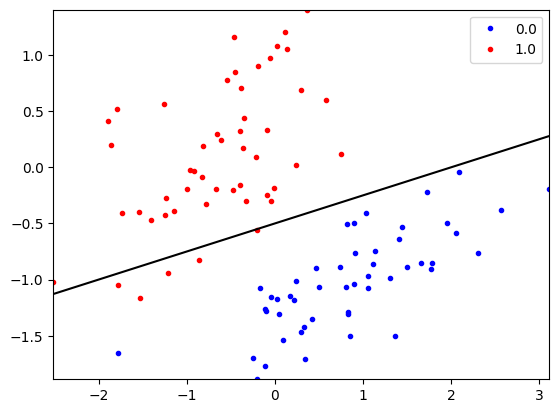

learner_B


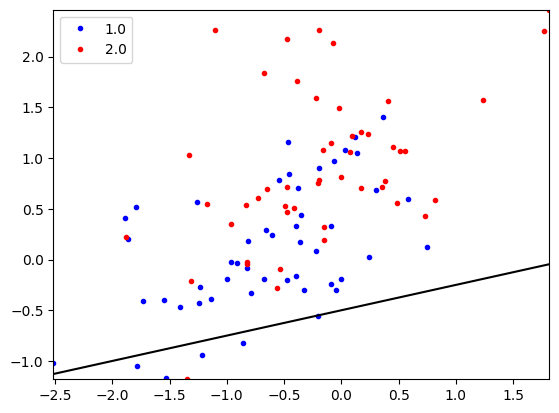

In [9]:
learners = [
        {'label': 'learner_A', 'learner': learner_A, 'x': XA, 'y': YA, 'class_labels': np.unique(YA)},
        {'label': 'learner_B', 'learner': learner_B, 'x': XB, 'y': YB, 'class_labels': np.unique(YB)}
]
for current_learner in learners:
        label, learner = current_learner['label'], current_learner['learner']
        x, y = current_learner['x'], current_learner['y']
        print(label)
        learner.plotBoundary(x, y)
        plt.legend(current_learner['class_labels'])
        plt.show()

### 3)
- Implementing the logisticClassify2.predict() function to make predictions using the classifier.

In [ ]:
def predict(self, X):
        """ Return the predictied class of each data point in X"""
        ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
        linear_response = [self.theta[0] + self.theta[1] * X[i,0] + self.theta[2] * X[i,1] for i in range(X.shape[0])]

        ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
        ##       else predict class 0:  Yhat[i] = self.classes[0]
        y_hat = np.array([self.classes[1] if z > 0 else self.classes[0] for z in linear_response])

        return y_hat

In [10]:
y_hat_A = learner_A.predict(XA)
y_hat_B = learner_B.predict(XB)

Verifying the function works by computing & reporting the error rate of the classifier in the previous part on both data sets A and B.

*The error rate on one should be ≈ 0.0505, and higher on the other.*

The Error Rate is calculated as follows:
$$ ErrorRate = \frac{1}{m} \sum_{i}^{m} Indicator(\hat{y}^{(i)} ≠ y^{(i)})$$ 

In [11]:
m = len(np.unique(YA))
y_hat_A_err_rate = learner_A.err(XA, YA)
y_hat_B_err_rate = learner_B.err(XB, YB)
print(f'{y_hat_A_err_rate=}')
print(f'{y_hat_B_err_rate=}')

y_hat_A_err_rate=0.050505050505050504
y_hat_B_err_rate=0.46464646464646464


### 4)
- Verifing that the predict code matches the boundary plot by using plotClassify2D (from ml tools) with the manually constructed learner on the two data sets.

learner_A


/Users/Tarek/Documents/UCI_MDS_Coding/cs273P/hw/3-Homework/Assignment 3/mltools/plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


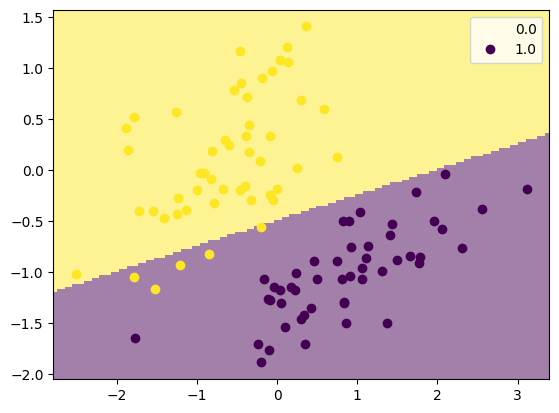

learner_B


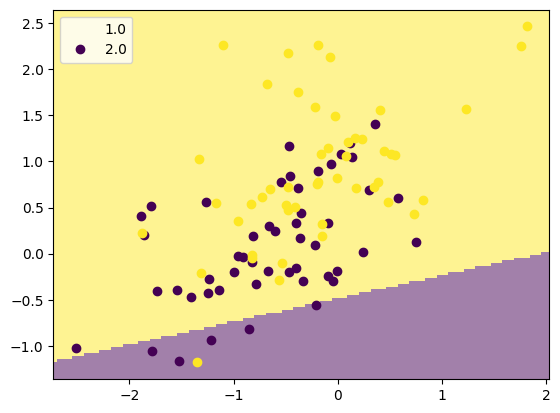

In [12]:
for current_learner in learners:
        learner = current_learner['learner']
        label, class_labels = current_learner['label'], current_learner['class_labels']
        x, y = current_learner['x'], current_learner['y']
        print(label)
        axis = plt
        ml.plotClassify2D(learner, x, y, axis=None)
        axis.legend(class_labels)
        axis.show()


### 5)
- Deriving the gradient of the negative log likelihood $J_j$ for logistic regression.

*Note: This gradient is used in the gradient descent code for the training in the next part.*

#### Negative Log Liklihood, $J_j$, for Logistic Regression

$$ J_j(\theta_i)= − y^{(j)} log\sigma (x^{(j)}\theta_i^{T}) − (1−y^{(j)}) log(1−\sigma(x^{(j)}\theta_i^{T})) $$

Given that there are 3 parameters, $\theta_0, \theta_1, \theta_2$, the gradient vector, $\nabla_\theta{J}$, would be the following:

$$ \nabla_\theta{J_j} = <\frac{\partial J_j}{\partial \theta_0}, \frac{\partial J_j}{\partial \theta_1}, \frac{\partial J_j}{\partial \theta_2}>$$

Alternative Notation

$$ \nabla_\theta{J_j} = (\sigma(x\theta_i^{T} - y))x^{(j)} = (\hat{y} - y)x^{(j)}$$

Partial Derivative w.r.t. to $\theta_i$

$$ \frac{\partial}{\partial \theta_i}J^{(j)}(\theta_i) =  y^{(j)}log(\sigma (x^{(j)}\theta_i^{T})) + (1 - y^{(j)})log(\sigma (x^{(j)}\theta_i^{T}))$$

#### Gradient,$\frac{\partial J_j(\theta_0)}{\partial \theta_0}$, of the Negative Log Liklihood, $J_j$, for Logistic Regression

$$ \frac{\partial}{\partial \theta_0}J^{(j)}(\theta_0) =  y^{(j)}log(\sigma (x^{(j)}\theta_0^{T})) + (1 - y^{(j)})log(\sigma (x^{(j)}\theta_0^{T}))$$

#### Gradient,$\frac{\partial J_j(\theta_1)}{\partial \theta_1}$, of the Negative Log Liklihood, $J_j$, for Logistic Regression

$$ \frac{\partial}{\partial \theta_1}J^{(j)}(\theta_1) =  y^{(j)}log(\sigma (x^{(j)}\theta_1^{T})) + (1 - y^{(j)})log(\sigma (x^{(j)}\theta_1^{T}))$$

#### Gradient,$\frac{\partial J_j(\theta_2)}{\partial \theta_2}$, of the Negative Log Liklihood, $J_j$, for Logistic Regression

$$ \frac{\partial}{\partial \theta_2}J^{(j)}(\theta_2) =  y^{(j)}log(\sigma (x^{(j)}\theta_2^{T})) + (1 - y^{(j)})log(\sigma (x^{(j)}\theta_2^{T}))$$

### 6)
- Complete train function to perform stochastic gradient descent on the logistic loss function.
- Include the complete implementation of train:

In [13]:
def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=True, regularization=None, lambda_value=None):
    """ Train the logistic regression using stochastic gradient descent """
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            
            #ri    = NotImplementedError;     # TODO: compute linear response r(x)
            ri = np.dot(self.theta, XX[i])
            si = self.sigmoid(ri)

            #gradi = NotImplementedError;     # TODO: compute gradient of NLL loss
            gradi = -YY[i] * (1 - si) * XX[i,:] + (1 - YY[i]) * si * XX[i,:]
            if regularization == 'l1' and lambda_value != None:
                reg_term = lambda_value * np.sign(self.theta)
                gradi += reg_term
            elif regularization == 'l2' and lambda_value != None:
                reg_term = (lambda_value/M) * self.theta
                gradi += reg_term
            
            
            self.theta -= stepsize * gradi;  # take a gradient step

        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        Jsur = (1/(M)) * np.sum([ (np.log(si)) if YY[i]==1 else (np.log(1-si)) ])
        if regularization == 'l1' and lambda_value != None:
            Jsur += (lambda_value) * np.sum(np.abs(self.theta))
        elif regularization == 'l2' and lambda_value != None:
            Jsur += (lambda_value/M) * np.dot(self.theta, self.theta.T)

        #print(f'{Jsur=}')
        
        #Jnll.append( NotImplementedError ) # TODO evaluate the current NLL loss
        Jnll.append(Jsur) # TODO evaluate the current NLL loss

        if plot is not False and plot is not 'last':
            plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            plt.pause(.01);                    # let OS draw the plot

        # For debugging: you may want to print current parameters & losses
        #print(f'{epoch=}')
        #print(self.theta, ' => ', Jnll[-1], ' / ', J01[-1])
        #raw_input()   # pause for keystroke
        #input()

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        #done = NotImplementedError;   # or if Jnll not changing between epochs ( < stopTol )
        # a stopping criterion consisting of two conditions
        #   (i)  reached stopEpochs epochs.
        #   (ii) J has not changed by more than stopTol since the last epoch
        if epoch == stopEpochs:  
            done = True
            if plot is 'last':
                plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
                if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
                plt.pause(.01);
            print(f'Stop (stopEpochs reached) at {epoch=}')        
        try:
            done = abs(Jnll[-1] - Jnll[-2]) <= stopTol
            if done == True:
                if plot is 'last':
                    plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
                    if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
                    plt.pause(.01);    
                print(f'Stop (stopTol theshold) at {epoch=}')
        except:
            pass

### 7)
- Run train for your logistic regression classifier on both data sets (A and B). 
- Include plots showing the convergence of the surrogate loss and error rate (e.g., the loss values as a function of epoch during gradient descent), and the final converged classifier with the data (the included train function does that for you already).
- Describe your parameter choices for each dataset (stepsize, etc.)

- Initially, when training the logistic classifier models on datasets A and B, I left the default parameters because I wanted to to see the difference in training between the a linearly separable dataset and non-linearly separable dataset. 
- **NOTE:** *For the the sake conciseness I created a dynamic plot parameter with a default value of True. When the parameter is set to 'last', the only time train plots will be generated is when training is complete. If it is set to False, then no plots whatsoever will be included. I did not set it to False or 'last' for the dataset A classifier because this model trained very quickly and only needed a couple of epochs to converge. The model for dataset B takes a longer time to converge, and so I set plot to 'last'.*

Trying default values first
- initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None

Learner A


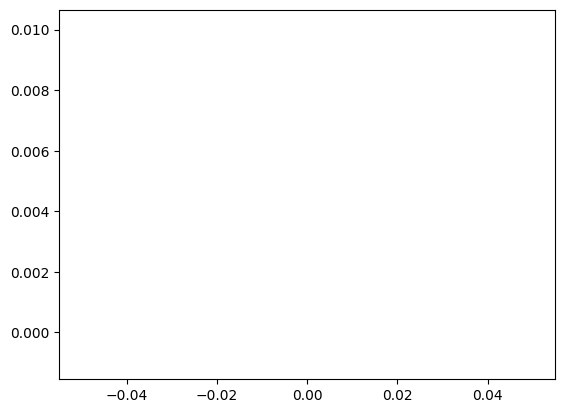

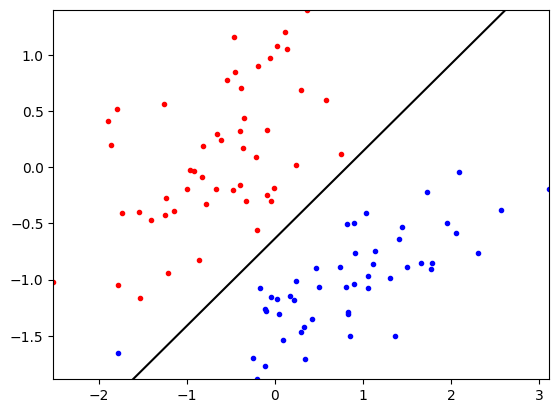

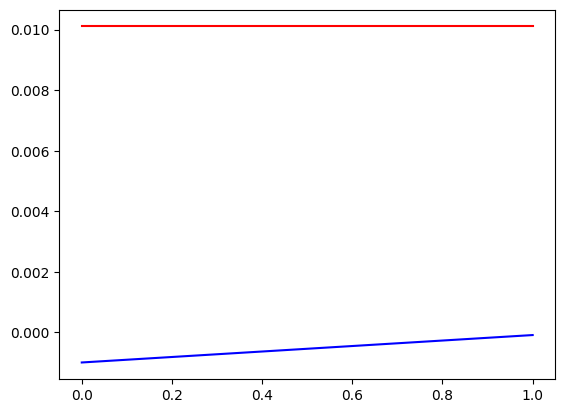

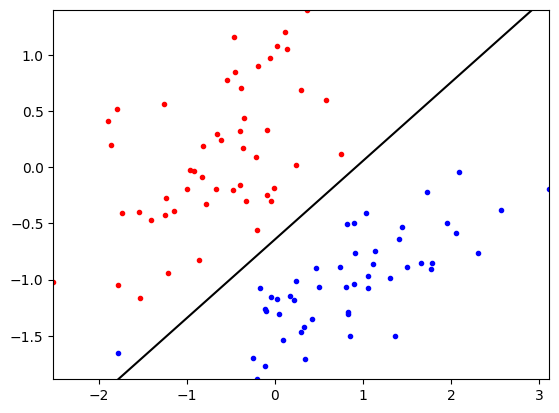

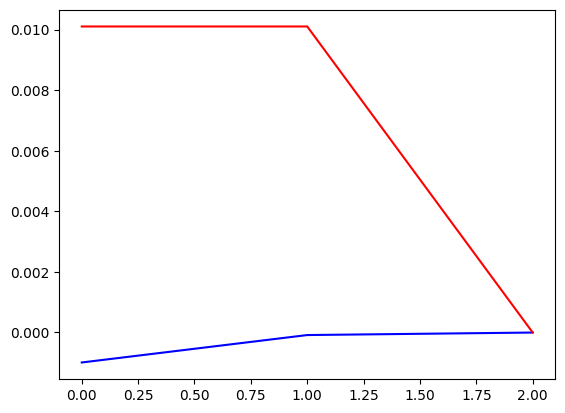

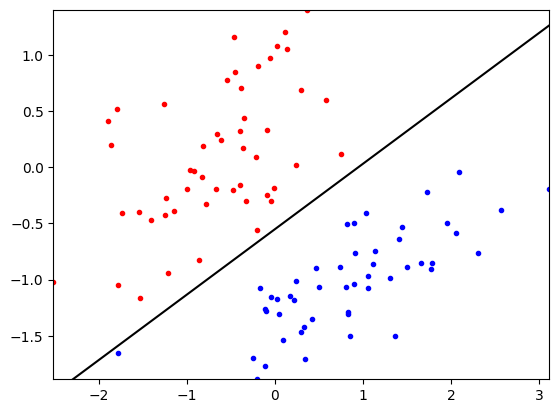

Stop (stopTol theshold) at epoch=3
Learner B


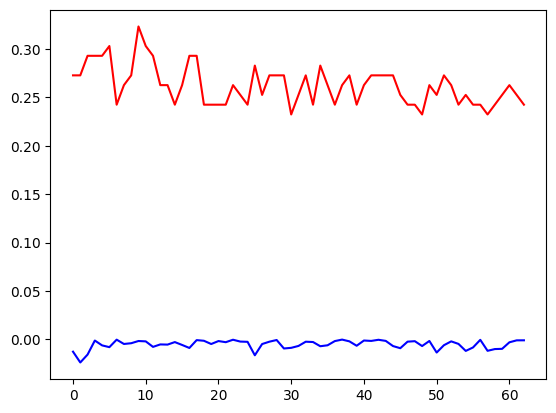

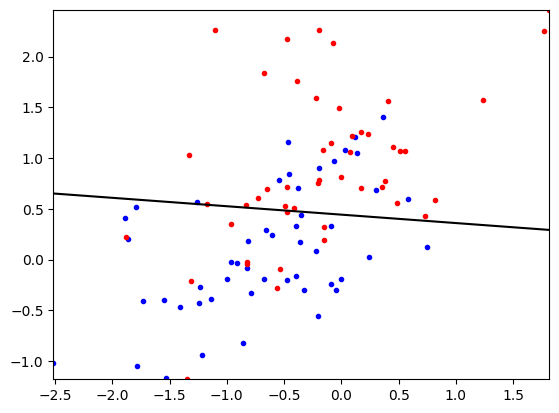

Stop (stopTol theshold) at epoch=63


In [14]:
print("Learner A")
learner_A.train(XA, YA)

# Note: Since Learner B goes through a lot of epochs, the plots were turned off except for the last epoch.
print("Learner B")
learner_B.train(XB, YB, plot='last')

### Testing different step size parameters

In the following cells, I conducted experiments with step size using only dataset A because I wanted to focus on the parameter experimentation. I tested a small size first to see if the objective function, J, decreases monotonically. Then I tested a very large step size to see how the objective function would behave as a result.
- First, I tried a very small step size of 1e-6 which yielded poor results. The reason the results were poor is because the difference in error is so small, the stop condition of training that checks if the difference is loss is not smaller than, stopTol (default is 1e-4). Because it performed so poorly, I decided to also update the stopTol to be a much smaller value of 1e-10 to allow the algorithm to perform long enough for me to see the monotonic decrease of the objective function.

For a new test learner, trying small step size of 1e-6 with default stopTol (1e-4).

Learner A with step size 1e-06


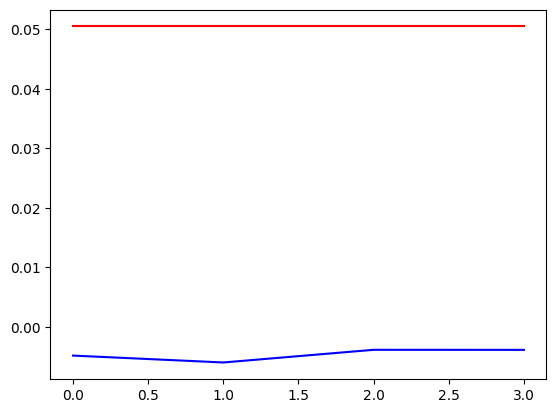

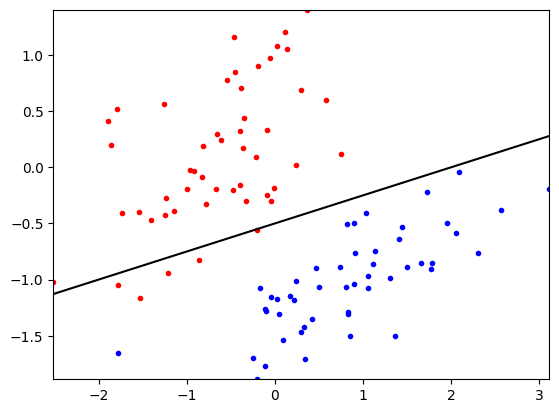

Stop (stopTol theshold) at epoch=4


In [15]:
step_size = 1e-6
test_learner = logisticClassify2()
test_learner.theta = np.array([0.5, -0.25, 1])
print(f"Learner A with step size {step_size}")
test_learner.train(XA, YA, initStep=step_size, plot='last')

Trying same small step size of 1e-6 but with a very small stopTol of 1e-10.

In [16]:
step_size = 1e-6
stopTol = 1e-10
test_learner_2 = logisticClassify2()
test_learner_2.theta = np.array([0.5, -0.25, 1])
print(f"Learner A with step size {step_size}")
test_learner_2.train(XA, YA, initStep=step_size, stopTol=stopTol, plot=False)

Learner A with step size 1e-06
Stop (stopTol theshold) at epoch=557


- The smaller value of stopTol, 1e-10, allowed the algorithm to run for many epochs, but the resulting decision boundary is still not effective. Perhaps if the stopTol was even smaller, the algorithm would be able to train long enough without meeting the stop condition. From the above experiments, I conclude that a very small step size is not good and a value close to the default one, 1.0, is more effective.
- Next, I conducted some experiments for a larger step size, 5.

For a new test learner, trying a big step sizes of 5

Learner A with step size 5


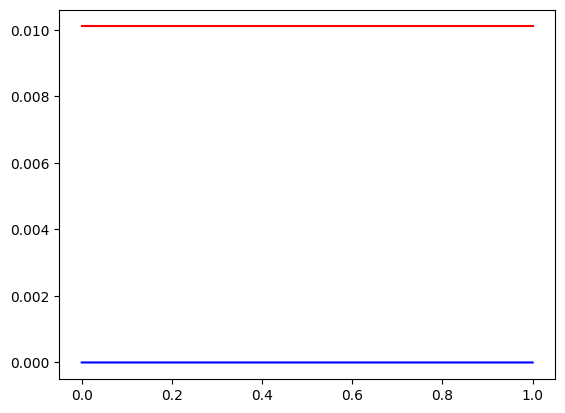

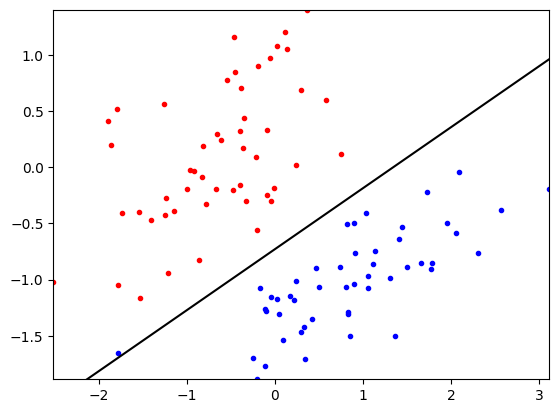

Stop (stopTol theshold) at epoch=2


In [17]:
step_size = 5
test_learner_3 = logisticClassify2()
test_learner_3.theta = np.array([0.5, -0.25, 1])
print(f"Learner A with step size {step_size}")
test_learner_3.train(XA, YA, initStep=step_size, plot='last')

The algorithm trained very fast with a large step size of 5 in only 2 epochs. The decision boundary is almost optimal but there is still at least 1 blue point that is missclassified. The reason this is because gradient's value exploded and so updates to algorithm were neglible resulting in the stop condition to execute.

*NOTE: the implementations of L1 and L2 regularization can be found in the cell above with the train method or in logisticClassify2 module train method.*

### 8)
- Add an L1 regularization term (+α Pi |θi|) to your surrogate loss function, and update the gradient and your code to reflect this addition. Try re-running your learner with some regularization (e.g. α = 2) and see how different the resulting parameters are. Find a value of α that gives noticeably different results & explain them.

Learner A with L1 regularization and a lambda value of 0.1


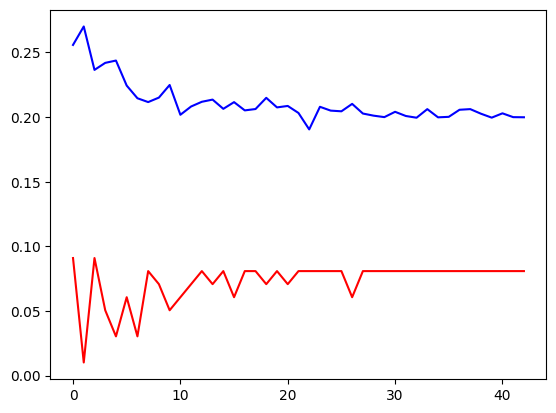

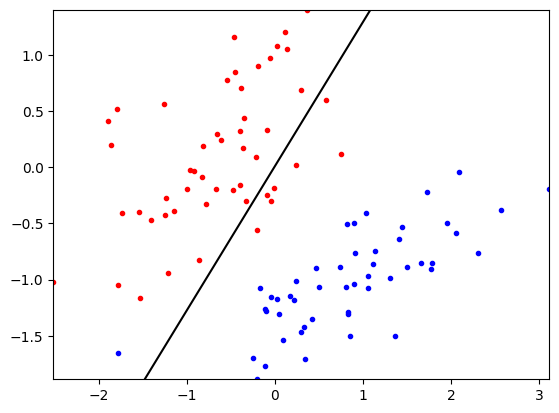

Stop (stopTol theshold) at epoch=43
(lambda_value=0.1) weights = [-0.00848824 -1.12530406  0.87591317]


Learner A with L1 regularization and a lambda value of 0.5


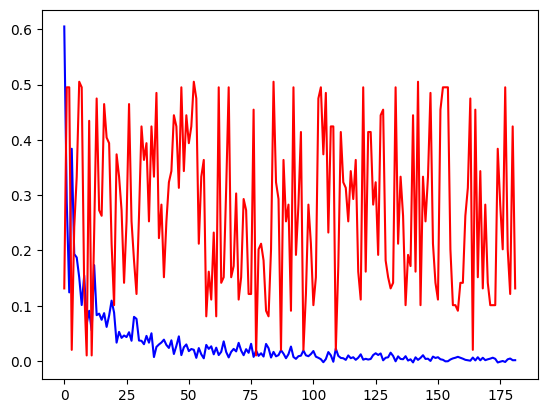

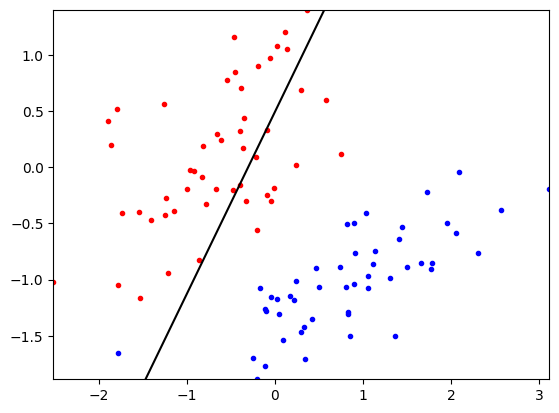

Stop (stopTol theshold) at epoch=182
(lambda_value=0.5) weights = [-0.00271196 -0.00892672  0.00550465]


Learner A with L1 regularization and a lambda value of 1.5


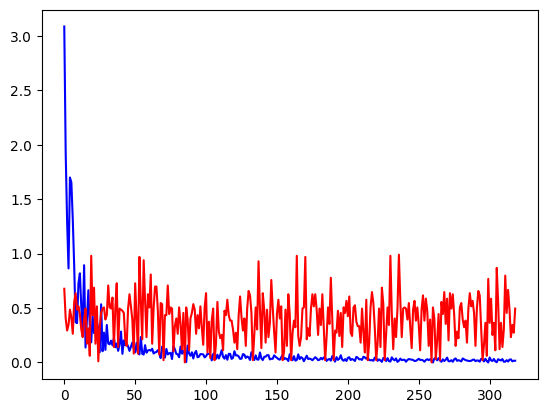

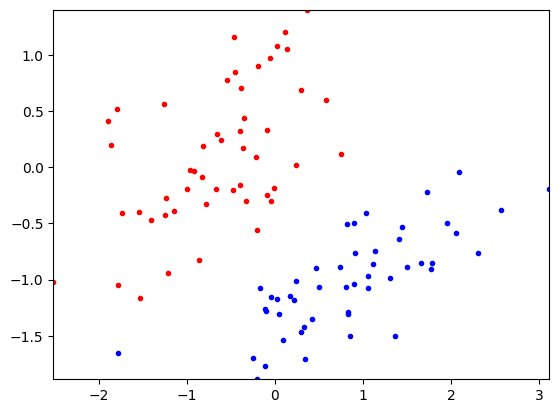

Stop (stopTol theshold) at epoch=319
(lambda_value=1.5) weights = [0.01039589 0.00074283 0.00362957]


Learner A with L1 regularization and a lambda value of 2


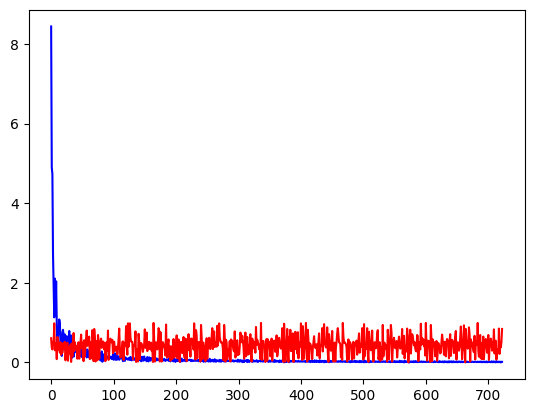

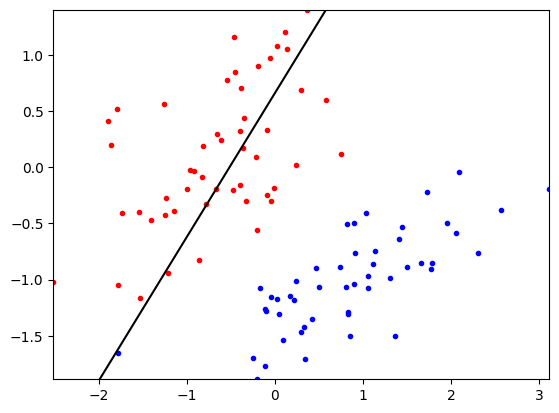

Stop (stopTol theshold) at epoch=723
(lambda_value=2) weights = [ 0.00224898  0.00436449 -0.00340559]


Learner A with L1 regularization and a lambda value of 3.0


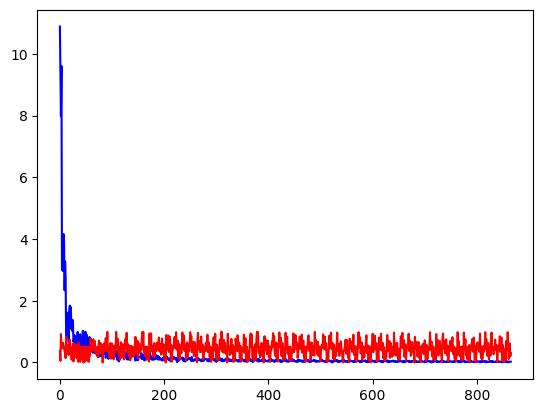

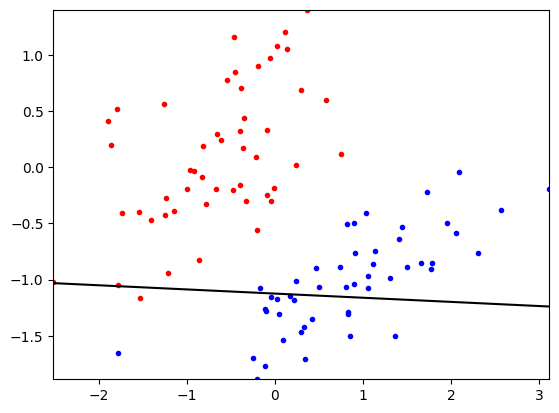

Stop (stopTol theshold) at epoch=866
(lambda_value=3.0) weights = [0.00555697 0.00018286 0.00494056]


Learner A with L1 regularization and a lambda value of 5.0


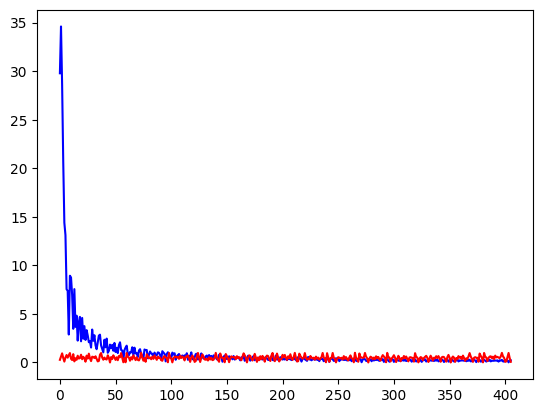

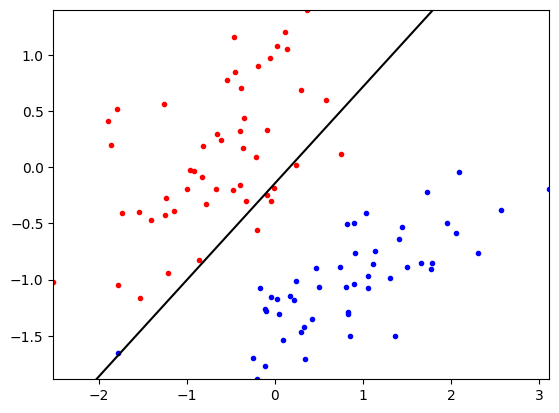

Stop (stopTol theshold) at epoch=406
(lambda_value=5.0) weights = [ 0.00314707 -0.01890324  0.02195456]




In [18]:
lambda_values = [0.1, 0.5, 1.5, 2, 3.0, 5.0]
for lambda_value in lambda_values:
        test_learner_l1 = logisticClassify2()
        test_learner_l1.theta = np.array([0.5, -0.25, 1])
        print(f"Learner A with L1 regularization and a lambda value of {lambda_value}")
        test_learner_l1.train(XA, YA, plot='last', regularization='l1', lambda_value=lambda_value)
        print(f'({lambda_value=}) weights = {test_learner_l1.theta}\n\n')

### 9)
- Add an L2 regularization term (+α Pi θi2) to your surrogate loss function, and update the gradient and your code to reflect this addition. Try re-running your learner with some regularization (e.g. α = 2) and see how different the resulting parameters are. Find a value of α that gives noticeably different results & explain them.

Learner A with L2 regularization and a lambda value of 0.1


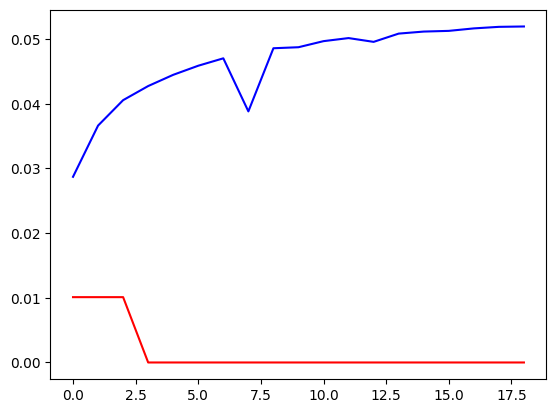

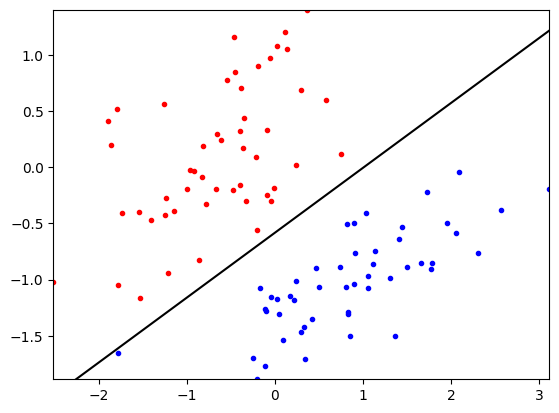

Stop (stopTol theshold) at epoch=19
(lambda_value=0.1) weights = [ 3.23674025 -3.21056553  5.55213141]


Learner A with L2 regularization and a lambda value of 0.5


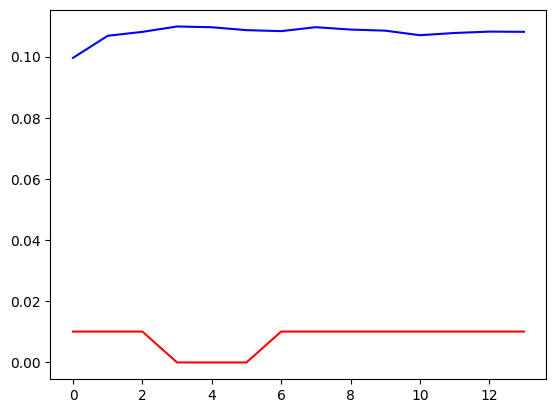

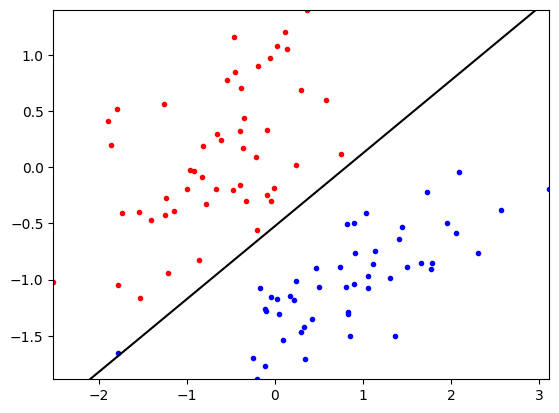

Stop (stopTol theshold) at epoch=14
(lambda_value=0.5) weights = [ 1.86152507 -2.30843132  3.55146644]


Learner A with L2 regularization and a lambda value of 1.5


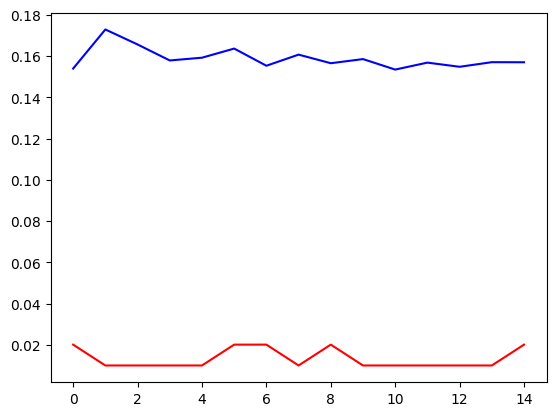

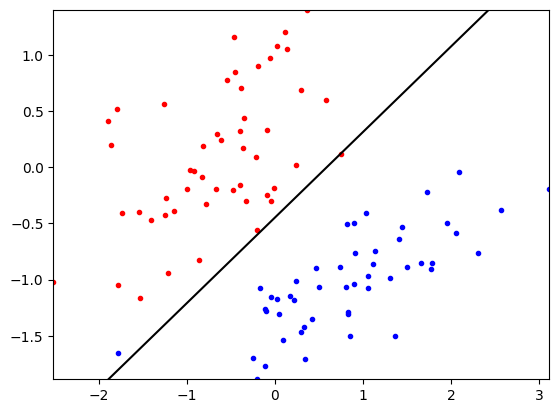

Stop (stopTol theshold) at epoch=15
(lambda_value=1.5) weights = [ 1.08141003 -1.84003785  2.41355446]


Learner A with L2 regularization and a lambda value of 2


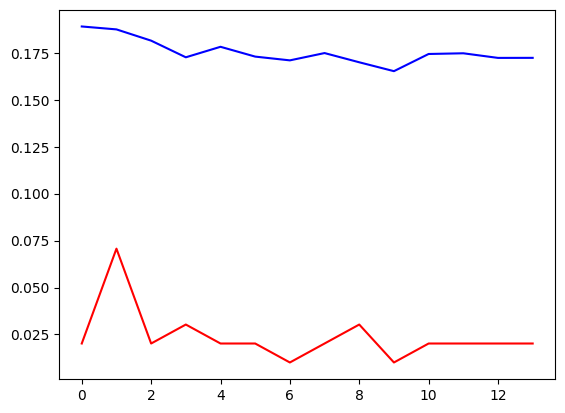

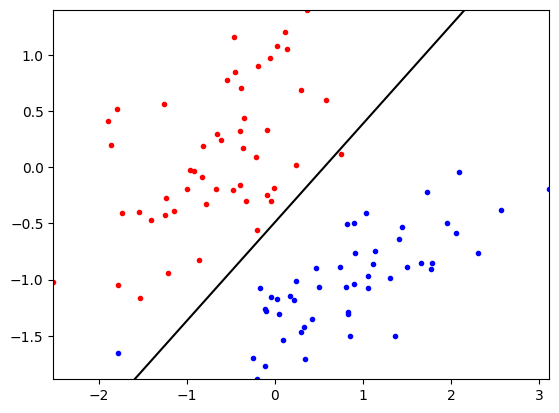

Stop (stopTol theshold) at epoch=14
(lambda_value=2) weights = [ 1.0095681  -1.81014416  2.06098326]


Learner A with L2 regularization and a lambda value of 3.0


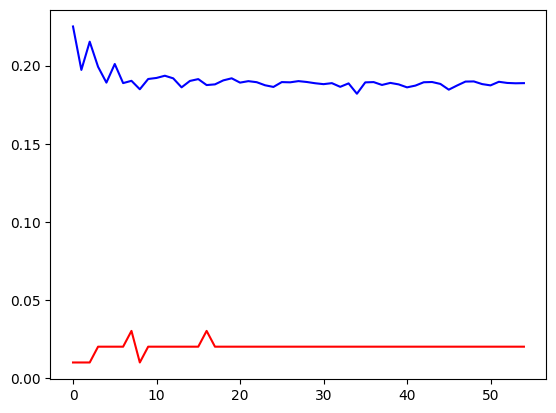

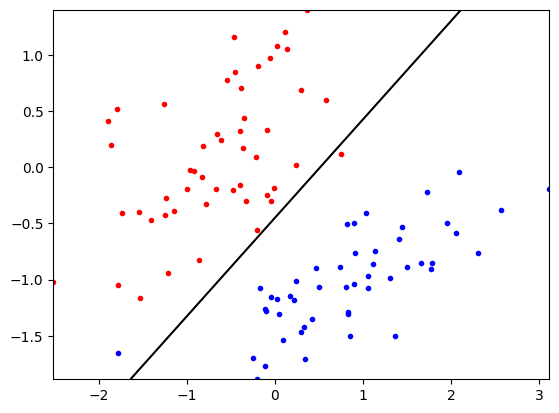

Stop (stopTol theshold) at epoch=55
(lambda_value=3.0) weights = [ 0.80272813 -1.56315285  1.78208276]


Learner A with L2 regularization and a lambda value of 5.0


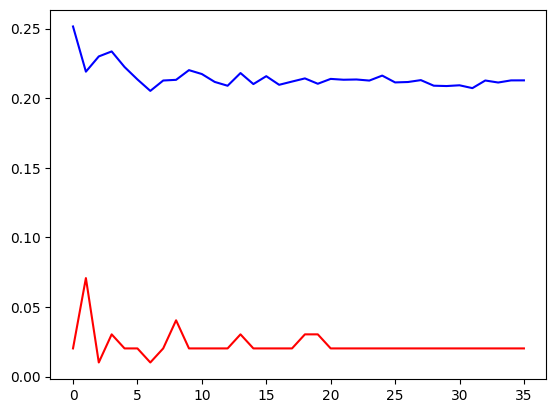

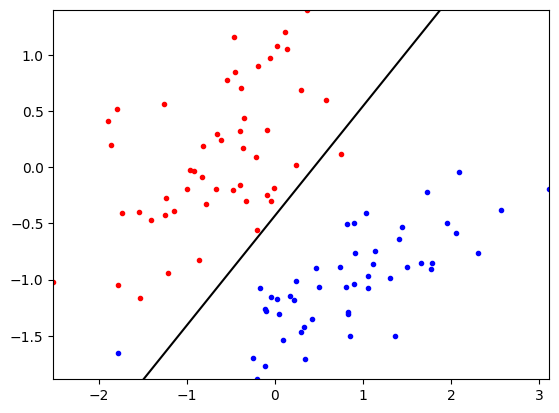

Stop (stopTol theshold) at epoch=36
(lambda_value=5.0) weights = [ 0.60605611 -1.37083273  1.40356858]




In [19]:
lambda_values = [0.1, 0.5, 1.5, 2, 3.0, 5.0]
for lambda_value in lambda_values:
        test_learner_l1 = logisticClassify2()
        test_learner_l1.theta = np.array([0.5, -0.25, 1])
        print(f"Learner A with L2 regularization and a lambda value of {lambda_value}")
        test_learner_l1.train(XA, YA, plot='last', regularization='l2', lambda_value=lambda_value)
        print(f'({lambda_value=}) weights = {test_learner_l1.theta}\n\n')

### 10) L1 and L2 Analysis
10a) What are the major differences between L1 and L2 regularization?
- The addition of the L1 penalty term to the cost and gradient results in shrinking the coefficients towards zero and possibly even 0 for some. It can be observed above that weights got very small and some very close to 0. Sometimes the l1 regularization resulted in poor model performance as demonstrated by the decision boundaries. Also, it can be observed that the L1 regularization took many epochs for convergence. This is because the gradient of the L1 penalty term is not differentiable at zero, so the optimizer must take smaller steps and make more updates to converge to a solution.
- The addition of the L2 regularization term to the cost and gradient results in shrinking the coefficients towards zero, but not setting any of them to exactly zero. It can be observed above that weights but further from 0 compared to L1. In general, the L2 regularization resulted in good model performance as demonstrated by the decision boundaries. Also, it can be observed that the L2 regularization took a lot fewer epochs for convergence. This is because the gradient of the L2 penalty term is always differentiable, so the optimizer can take larger steps and make fewer updates to converge to a solution.

10b) Which regularization method do you think fits this problem in a better way?
- L2 definitely fits this problem better in terms of model performance as demonstrated by the experiments above. Often times, the L1 regularization would result in poor performing decision boundaries because the weights became so small and close to 0. L1 could still be helpful for feature selection since it is possible to find a weight coefficient with a value of exactly 0, which would suggest that covariate is not contributing to the prediction of the model. Reducing features is very important in the real world settings given the large number of features in used in models.